<a href="https://colab.research.google.com/github/maycmesquia/Kaggle_Competition/blob/main/2022_08_Tabular_Playground_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados e Contatos

Ola, sou *Maycon Mendes*, Cientista Contábil e Cientista de Dados (Data Scientist)!

Acredito fortemente que: conhecer a causa é mais importante para solucionar o problema!

Cada vez mais devemos buscar informação e conhecimento, pois e atraves deles que podemos discernir o boato do fato, a verdade da mentira!

**Contatos:**

- [Kaggle](https://www.kaggle.com/maycondsmendes)

- [Linkedin](https://www.linkedin.com/in/maycon-douglas-data-science/)

- [Github](https://github.com/maycmesquia)

- E-mail: [maycmesquita@gmail.com](https://maycmesquita@gmail.com)

# Tabular Playgroud Series

Competição do [Kaggle](https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/overview/description)

A edição de agosto de 2022 da Tabular Playground Series é uma oportunidade para ajudar a empresa fictícia Keep It Dry a melhorar seu principal produto Super Soaker .

O produto é usado em fábricas para absorver derramamentos e vazamentos.

A empresa acaba de concluir um grande estudo de teste para diferentes protótipos de produtos.

Você pode usar esses dados para construir um modelo que prevê falhas do produto?

Avaliação 

As submissões são avaliadas na área sob a curva ROC entre a probabilidade prevista e o alvo observado.

Arquivo de envio
Para cada um idno conjunto de teste, você deve prever uma probabilidade a failure. O arquivo deve conter um cabeçalho e ter o seguinte formato:

- id,failure
- 26570,0.2
- 26571,0.1
- 26572,0.9


## Preparando ambiente

In [ ]:
# Blibiotecas Basicas!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de Aprendizagem!

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Criando Funções

def avaliacao(estimador, X_train, X_val, y_train, y_val):
    """
    Para avaliar o estimador, ele solicita as seguintes dados:
    estimador, X_train, X_val, y_train, y_val
    """

    y_pred_train = estimador.predict(X_train)

    fpr, tpr, thresholds = roc_curve(y_train, y_pred_train, pos_label=1)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                              estimator_name='Train')
    
    display.plot()
    plt.show()

    y_pred_val = estimador.predict(X_val)

    fpr, tpr, thresholds = roc_curve(y_val, y_pred_val, pos_label=1)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                              estimator_name='Val')
    
    display.plot()
    plt.show()

def submissao(estimador, X_test, id_test, cabecalho, nome):
    """
    Para criar o arquivo que ira ser submetido na competição Kaggle
    Solicita os seguintes parametros: estimador, X_test, id_test, cabecalho, nome
    """
    y_proba = estimador.predict_proba(X_test)[:,1]
    comp = ".csv"
    local = 'Submissoes/'
    pd.Series(y_proba, index=id_test, name=cabecalho).to_csv(end + local + nome + comp, header=True)
    print(f'Arquivo salvo com sucesso! em: {end + local}')

[Espelhar em!](https://colab.research.google.com/drive/1lS1mwbgrA4kMmeE7mjks_IzjySly4fHu#scrollTo=5x3UQ5cd-90l)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
# Geralzão ! Clean

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.pipeline import Pipeline

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

import pickle

## Dados Colab Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
end = '/content/drive/Othercomputers/Meu laptop/Dados/2022.08 - Tabular Playground Series/'
train = pd.read_csv(end + 'Dados/train.csv')
test = pd.read_csv(end + 'Dados/test.csv')

## Dados Jupyter Lab

In [ ]:
end = ''
train = pd.read_csv("Dados/train.csv")
test = pd.read_csv("Dados/test.csv")

## Objetivos:

Realizar uma submissão com um ROE entre: x e y



## Analisando os dados

In [ ]:
train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [ ]:
test

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
20771,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210


In [ ]:
train.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

In [ ]:
test.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

### Avaliando valores ausentes

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [ ]:
train

### Avaliando as Features!

In [ ]:
for feature in train.columns:
    print(f'{feature} : {train[feature].unique()}')

id : [    0     1     2 ... 26567 26568 26569]
product_code : ['A' 'B' 'C' 'D' 'E']
loading : [ 80.1   84.89  82.43 ... 171.32 124.77 106.38]
attribute_0 : ['material_7' 'material_5']
attribute_1 : ['material_8' 'material_5' 'material_6']
attribute_2 : [9 8 5 6]
attribute_3 : [5 8 6 9]
measurement_0 : [ 7 14 12 13  9 11  4 10  6  8 21 15 17 18 19 16  5 25  3  1 23 20 22  2
 26 24  0 29 27]
measurement_1 : [ 8  3  1  2  4  6  0  9  5  7 10 12 11 13 17 14 16 15 18 20 24 22 21 19
 23 27 25 26 29 28]
measurement_2 : [ 4  3  5  6  8  0  7  2 10  9 15 12 11  1 13 16 14 19 17 18 20 21 23 24
 22]
measurement_3 : [18.04  18.213 18.057 ... 16.393 15.503 15.835]
measurement_4 : [12.518 11.54  11.652 ... 13.702  8.35  13.914]
measurement_5 : [15.748 17.717 16.738 ... 19.683 15.075 14.508]
measurement_6 : [19.292 17.893 18.24  ... 19.274 15.636 19.396]
measurement_7 : [11.739 12.748 12.718 ... 14.58   9.169  8.926]
measurement_8 : [20.155 17.889 18.288 ... 20.632 16.453 21.405]
measurement_9 : [10.

<AxesSubplot:xlabel='loading', ylabel='Count'>

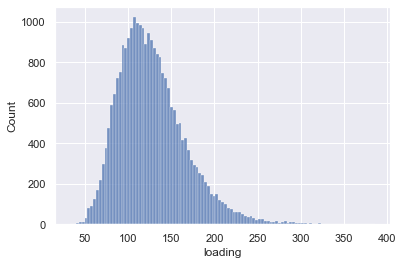

In [ ]:
sns.histplot(data=train, x='loading')

<AxesSubplot:xlabel='measurement_16', ylabel='Count'>

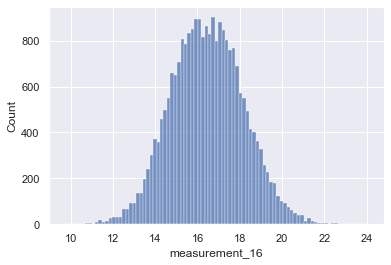

In [ ]:
sns.histplot(data=train, x='measurement_16')

# Sample Submission

A sample submission teve o desempenho de 0.50000 de score ROC

In [ ]:
ROC = 0.50000

## Criando o modelo basico

Como modelo inicial iremos utilizar o Hist Gradient Boosting Classifier
ele permite consegue utilizar dados ausentes para treinar o modelo.

Iremos desconciderar todos as features categoricas.

In [ ]:
drop = ['id', 'product_code', 'attribute_0', 'attribute_1', 'attribute_2', 'attribute_3', 'failure']
X = train.drop(columns=drop, axis=1)
y = train['failure']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

dados_split = (X_train, X_val, y_train, y_val)
dados_train = (X_train, y_train)
dados_val = (X_val, y_val)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((21256, 19), (21256,), (5314, 19), (5314,))

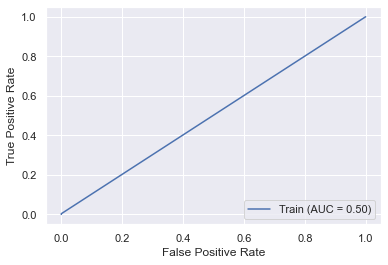

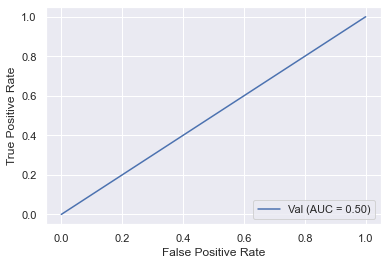

Wall time: 2.25 s


In [ ]:
%%time

hgbc_basiline = HistGradientBoostingClassifier().fit(X_train, y_train)

avaliacao(hgbc_basiline, *dados_split)

### Avaliando o estimador

A submissão da previsão gerada pelo modelo HGBC deu um ROC de 0.57232

In [ ]:
drop = ['id', 'product_code', 'attribute_0', 'attribute_1', 'attribute_2', 'attribute_3']

X_train = train.drop(drop + ['failure'], axis=1)
y_train = train['failure']
X_test = test.drop(drop, axis=1)

hgbc_sub = HistGradientBoostingClassifier().fit(X_train, y_train)

id_test = test['id']
cabecalho = ['id', 'failure']
submissao(hgbc_sub, X_test, id_test, cabecalho='failure', nome='HGBC_3')

Arquivo salvo com sucesso! em: Submissoes/


## Melhorando os dados!


In [ ]:
train.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [ ]:
drop = ['id', 'product_code', 'attribute_0', 'attribute_1', 'attribute_2', 'attribute_3', 'failure']
df_train = train.dropna()
X = df_train.drop(columns=drop, axis=1)
y = df_train['failure']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

dados_split = (X_train, X_val, y_train, y_val)
dados_train = (X_train, y_train)
dados_val = (X_val, y_val)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((9746, 19), (9746,), (2437, 19), (2437,))

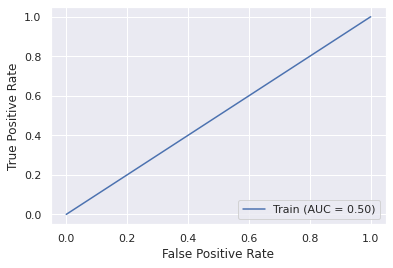

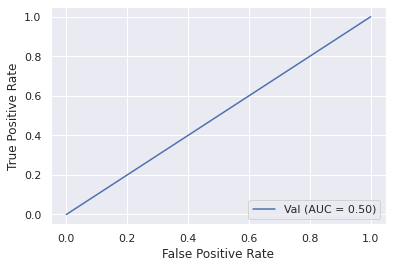

CPU times: user 936 ms, sys: 548 ms, total: 1.48 s
Wall time: 1.14 s


In [ ]:
%%time

lr_basiline = LogisticRegression().fit(*dados_train)

avaliacao(lr_basiline, *dados_split)

In [ ]:
df_train = train.dropna()
df_train.isna().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

Utilizando todos os dados!

In [ ]:
def val_split(train, test, Id, predicao):
    """
    Retorna: X_train, X_val, X_test, y_train, y_val
    """
    X = train.drop(columns=[Id, predicao, 'product_code', 'attribute_1'])
    y = train[predicao]
    X_test = test.drop(columns=[Id, 'product_code', 'attribute_1'])
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    return X_train, X_val, X_test, y_train, y_val
      
    
def feature_cat_num(X_train):
    
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()
    features_num = X_train.select_dtypes(include=np.number).columns.tolist()
    
    return features_cat, features_num

def transformer(X_train):
    
    features_cat, features_num = feature_cat_num(X_train)
    
    pipe_cat = Pipeline([('input_cat', SimpleImputer(strategy='constant', fill_value='unknown')),
                    ('onehot', OneHotEncoder())])
    
    pipe_num = Pipeline([('input_num', SimpleImputer(strategy='mean')),
                     ('std', StandardScaler())])
    
    pre_process = ColumnTransformer([('transform_num', pipe_num, features_num),
                                     ('transform_cat', pipe_cat, features_cat)])
    
    return pre_process
    

In [ ]:
X_train, X_val, X_test, y_train, y_val = val_split(train, test, 'id', 'failure')

pipe_pre = transformer(X_train)

In [ ]:
pipe_model_log_reg = Pipeline([('pre_processador', pipe_pre),
                               ('Log_reg', LogisticRegression())])

pipe_model_log_reg.fit(X_train, y_train)

Pipeline(steps=[('pre_processador',
                 ColumnTransformer(transformers=[('transform_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['loading', 'attribute_2',
                                                   'attribute_3',
                                                   'measurement_0',
                                                   'measurement_1',
                                                   'measurement_2',
                                                   'measurement_3',
                                                   'measurement_4',
                                                   'measurement_5',
                   

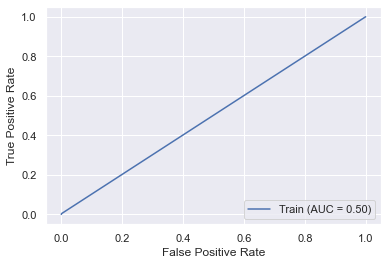

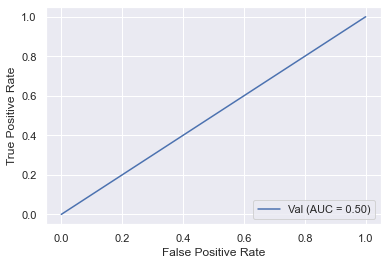

In [ ]:
avaliacao(pipe_model_log_reg, X_train, X_val, y_train, y_val)

In [ ]:
id_test = test['id']
cabecalho = 'failure'
nome = "Pipe_Logistic_Regression"

submissao(pipe_model_log_reg, X_test, id_test, cabecalho, nome)

Arquivo salvo com sucesso! em: Submissoes/


In [ ]:
pipe_model_log_reg.predict_proba(X_val)[:,-1]

array([0.19260434, 0.26902316, 0.12007874, ..., 0.1830026 , 0.24536227,
       0.13204676])

In [ ]:
pipe_model_log_reg.predict(X_test)[:,-1]

ValueError: Found unknown categories ['I', 'F', 'G', 'H'] in column 0 during transform

In [ ]:
X_train

for feature in X_train.columns:
    print(f'{feature} : {X_train[feature].unique()}')

product_code : ['A' 'E' 'B' 'D' 'C']
loading : [ 94.34 117.02 256.42 ... 176.15 231.58 181.27]
attribute_0 : ['material_7' 'material_5']
attribute_1 : ['material_8' 'material_6' 'material_5']
attribute_2 : [9 6 8 5]
attribute_3 : [5 9 8 6]
measurement_0 : [ 6 11  5 17  9  7  1  2 14  8  4 10 12  0 15  3 18 13 21 16 19 20 22 23
 24 25 26 29 27]
measurement_1 : [ 2 10 13  6 12  9  5 11  8  7  4 17 15  3 16 14 19  0 21  1 23 20 18 22
 25 24 28 27 29 26]
measurement_2 : [ 3  7 10  8  5  2  4  6 12 11  1 16  9 14 15  0 13 17 19 18 21 23 20 24
 22]
measurement_3 : [16.797 17.091 17.936 ... 15.563 17.053 15.783]
measurement_4 : [12.504 12.278 11.357 ... 13.667 13.689  9.228]
measurement_5 : [17.534 15.997 16.163 ... 16.052 19.258 14.761]
measurement_6 : [17.523 16.921 17.244 ... 15.618 19.249 15.212]
measurement_7 : [12.986 12.483 12.06  ... 13.615 14.199  9.715]
measurement_8 : [19.461 20.628 18.308 ... 17.174 21.392 20.42 ]
measurement_9 : [10.625 10.941 10.62  ... 10.165  9.29   9.059]
mea

In [ ]:
X_test

for feature in X_test.columns:
    print(f'{feature} : {X_test[feature].unique()}')

product_code : ['F' 'G' 'H' 'I']
loading : [119.57 113.51 112.16 ... 254.3   67.73  85.97]
attribute_0 : ['material_5' 'material_7']
attribute_1 : ['material_6' 'material_7' 'material_5']
attribute_2 : [6 9 7]
attribute_3 : [4 7 9 5]
measurement_0 : [ 6 11  8 14 10 16  7 20  9  5  2 13  3  4 15 19 12 22 21 18 17 23  0 26
 24  1 25 29 30 28]
measurement_1 : [ 9  8 12 11 16 18  7 15 19 10 13  6 14  5  2  4 17 25 22 21 23  3 20 26
 24 31 27 28  1 29 33 32  0]
measurement_2 : [ 6  0  4 10  8  7 11  9 18  3 13  5  1 12 21  2 15 22 17 16 14 24 19 23
 20 26 28 25]
measurement_3 : [19.305 17.883 18.475 ... 15.632 15.796 14.669]
measurement_4 : [10.178 11.927 10.481 ...  9.355 14.105 13.852]
measurement_5 : [17.534 17.228 16.619 ... 13.782 18.692 18.847]
measurement_6 : [18.168 16.033 18.189 ... 16.035 18.907 19.002]
measurement_7 : [11.598 11.179 12.126 ...  8.246 13.333 13.477]
measurement_8 : [18.654 19.368 17.774 ... 21.783 21.43  16.732]
measurement_9 : [10.802 12.032 11.743 ...  8.491 12.

In [ ]:
X_test['product_code']

0        F
1        F
2        F
3        F
4        F
        ..
20770    I
20771    I
20772    I
20773    I
20774    I
Name: product_code, Length: 20775, dtype: object

In [ ]:
X_val

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
14723,C,131.58,material_7,material_8,5,8,2,15,6,18.809,...,20.271,12.912,17.403,18.327,10.753,14.791,NaN,14.420,15.399,733.887
20260,D,169.11,material_7,material_5,6,6,10,11,7,18.683,...,17.343,13.174,16.851,19.138,11.821,16.438,17.588,15.337,17.717,609.503
26146,E,69.33,material_7,material_6,6,9,3,9,5,16.169,...,18.593,10.921,17.236,19.331,12.735,15.661,13.874,13.694,14.745,598.993
11670,C,188.55,material_7,material_8,5,8,1,14,6,17.603,...,20.160,11.989,16.363,18.400,10.408,16.258,13.333,14.912,17.457,802.517
22362,E,113.21,material_7,material_6,6,9,4,9,7,15.723,...,17.652,11.187,15.970,19.717,11.140,14.812,12.752,14.819,15.874,512.937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23554,E,138.31,material_7,material_6,6,9,8,9,6,17.313,...,16.914,11.706,16.950,18.438,NaN,NaN,12.756,15.344,16.575,382.636
2177,A,104.65,material_7,material_8,9,5,8,5,7,18.982,...,19.435,10.986,16.508,20.607,14.845,15.548,14.086,11.081,13.037,833.273
26378,E,126.86,material_7,material_6,6,9,3,13,3,16.470,...,19.050,11.969,16.750,19.104,10.269,15.497,16.752,14.328,18.659,634.502
24602,E,149.62,material_7,material_6,6,9,1,6,13,17.220,...,17.437,11.802,17.782,20.584,11.095,14.778,15.210,14.558,17.707,595.112
